In [31]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
from utils import cv2_imshow

img = cv2.imread("./images/view.jpg")

(r, c) = img.shape[:2]
pts1 = np.float32([[0, 0], [r, 0], [0, c]])
pts2 = np.float32([[50, 0], [r, 50], [0, c - 50]])

<IPython.core.display.Javascript object>

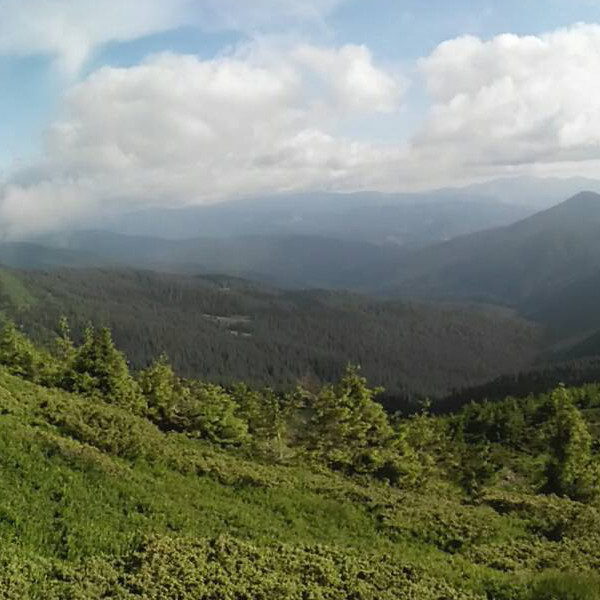

In [ ]:
# implement this function
# M = cv2.getAffineTransform(pts1,pts2)
def getAffineTransform(p1, p2):
    A = np.array(
        [
            [p1[0][0], p1[0][1], 0, 0, 1, 0],
            [0, 0, p1[0][0], p1[0][1], 0, 1],
            [p1[1][0], p1[1][1], 0, 0, 1, 0],
            [0, 0, p1[1][0], p1[1][1], 0, 1],
            [p1[2][0], p1[2][1], 0, 0, 1, 0],
            [0, 0, p1[2][0], p1[2][1], 0, 1],
        ]
    )

    y = np.array([p2[0][0], p2[0][1], p2[1][0], p2[1][1], p2[2][0], p2[2][1]])

    x = np.dot(np.linalg.inv(A), y)

    return np.array([[x[0], x[1], x[4]], [x[2], x[3], x[5]]])


M = getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, img.shape[:2])
cv2_imshow(img)
cv2_imshow(dst)